<ipython-input-1-fd11cdef31c4>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('<1%', 0.005)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


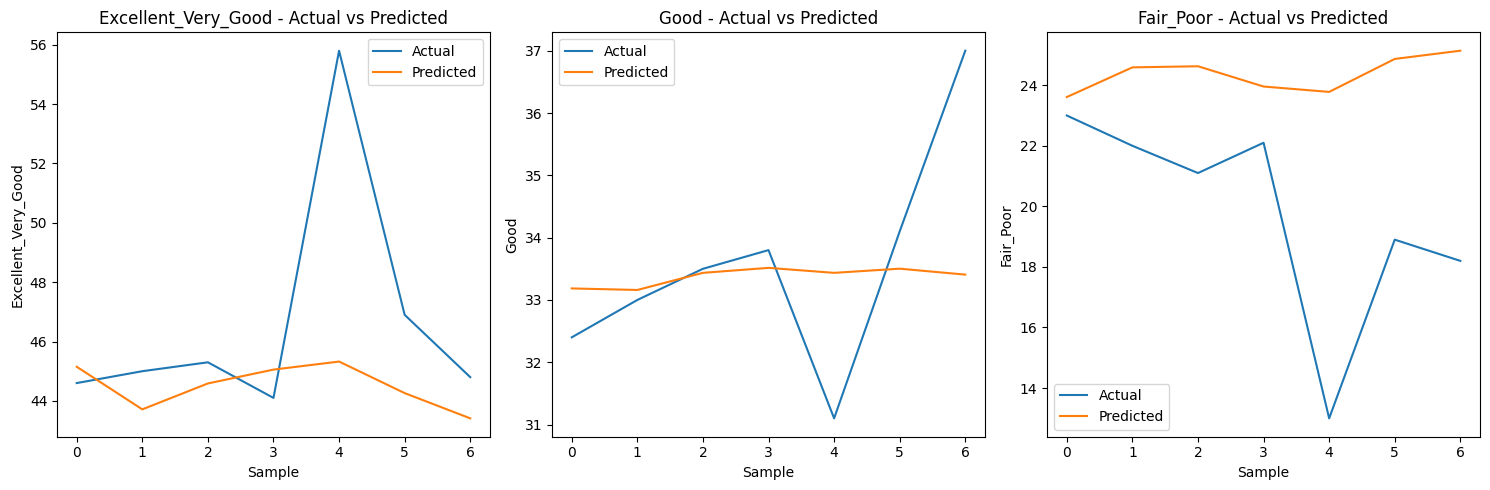

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Final_Filtered_Dataset.csv')

df['Province'] = df['Province'].astype('category').cat.codes
df = df.replace('<1%', 0.005)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

features = df.drop(columns=["Excellent_Very_Good", "Good", "Fair_Poor"])
targets = df[["Excellent_Very_Good", "Good", "Fair_Poor"]]

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(targets)

def create_lstm_data(X, y, time_steps=5):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_lstm, y_lstm = create_lstm_data(X_scaled, y_scaled)


split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]


model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1, verbose=0)


y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)


labels = ["Excellent_Very_Good", "Good", "Fair_Poor"]
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.plot(y_test_inv[:, i], label='Actual')
    plt.plot(y_pred[:, i], label='Predicted')
    plt.title(f"{labels[i]} - Actual vs Predicted")
    plt.xlabel("Sample")
    plt.ylabel(labels[i])
    plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-2-7a5f4f104a5c>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Mental Health Help'] = df['Mental Health Help'].replace('<1%', 0.5).astype(float)


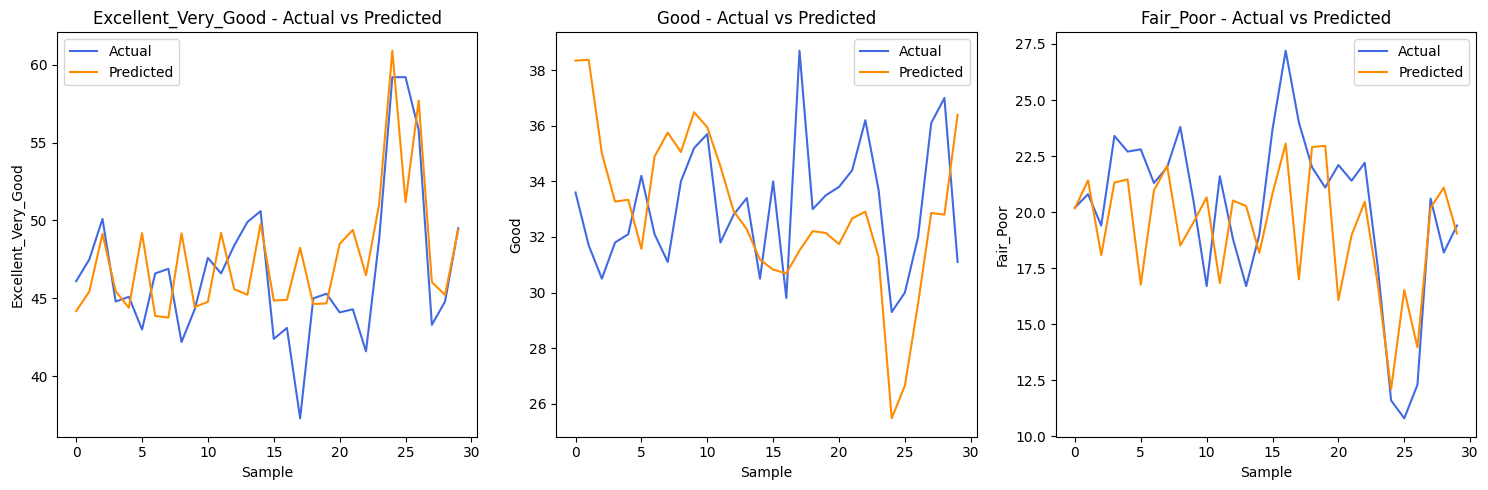

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Final_Filtered_Dataset.csv')

df['Mental Health Help'] = df['Mental Health Help'].replace('<1%', 0.5).astype(float)
df['Therapy'] = pd.to_numeric(df['Therapy'], errors='coerce')
df['Therapy'] = df['Therapy'].fillna(df['Therapy'].mean())
df = pd.get_dummies(df, columns=['Province'])


X = df.drop(['Excellent_Very_Good', 'Good', 'Fair_Poor'], axis=1)
y_exc = df['Excellent_Very_Good']
y_good = df['Good']
y_fair = df['Fair_Poor']


train = df[df['YEAR'] < 2023]
test = df[df['YEAR'] == 2023]

X_train = train.drop(['Excellent_Very_Good', 'Good', 'Fair_Poor'], axis=1)
X_test = test.drop(['Excellent_Very_Good', 'Good', 'Fair_Poor'], axis=1)

y_train_exc = train['Excellent_Very_Good']
y_test_exc = test['Excellent_Very_Good']
y_train_good = train['Good']
y_test_good = test['Good']
y_train_fair = train['Fair_Poor']
y_test_fair = test['Fair_Poor']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def train_model(X, y):
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
    model.fit(X, y)
    return model

model_exc = train_model(X_train_scaled, y_train_exc)
model_good = train_model(X_train_scaled, y_train_good)
model_fair = train_model(X_train_scaled, y_train_fair)


y_pred_exc = model_exc.predict(X_test_scaled)
y_pred_good = model_good.predict(X_test_scaled)
y_pred_fair = model_fair.predict(X_test_scaled)


labels = ["Excellent_Very_Good", "Good", "Fair_Poor"]
actuals = [y_test_exc.values, y_test_good.values, y_test_fair.values]
preds = [y_pred_exc, y_pred_good, y_pred_fair]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.plot(actuals[i], label='Actual', color='royalblue')
    plt.plot(preds[i], label='Predicted', color='darkorange')
    plt.title(f"{labels[i]} - Actual vs Predicted")
    plt.xlabel("Sample")
    plt.ylabel(labels[i])
    plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-3-e02be2c41e56>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


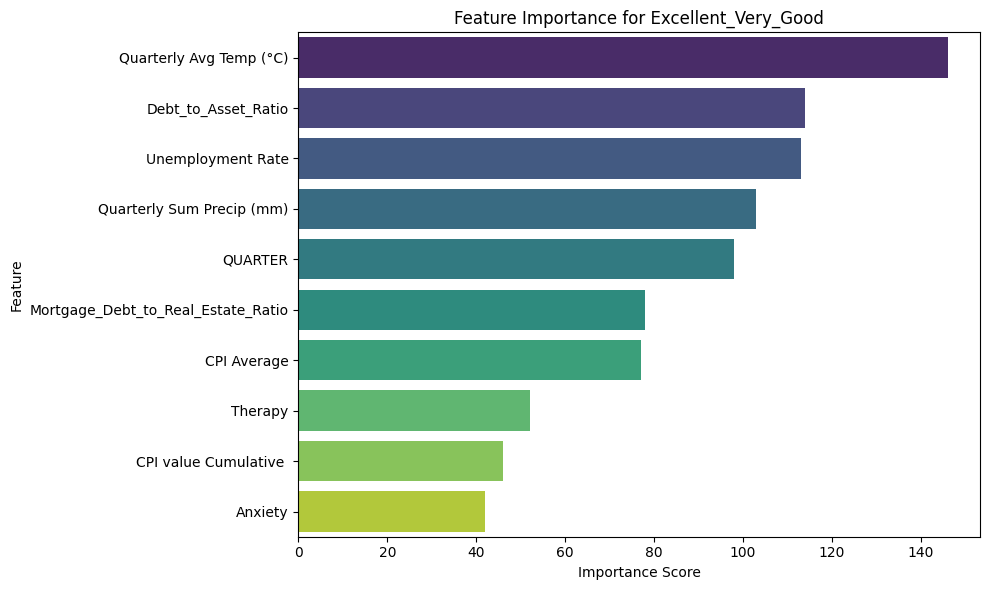

<ipython-input-3-e02be2c41e56>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


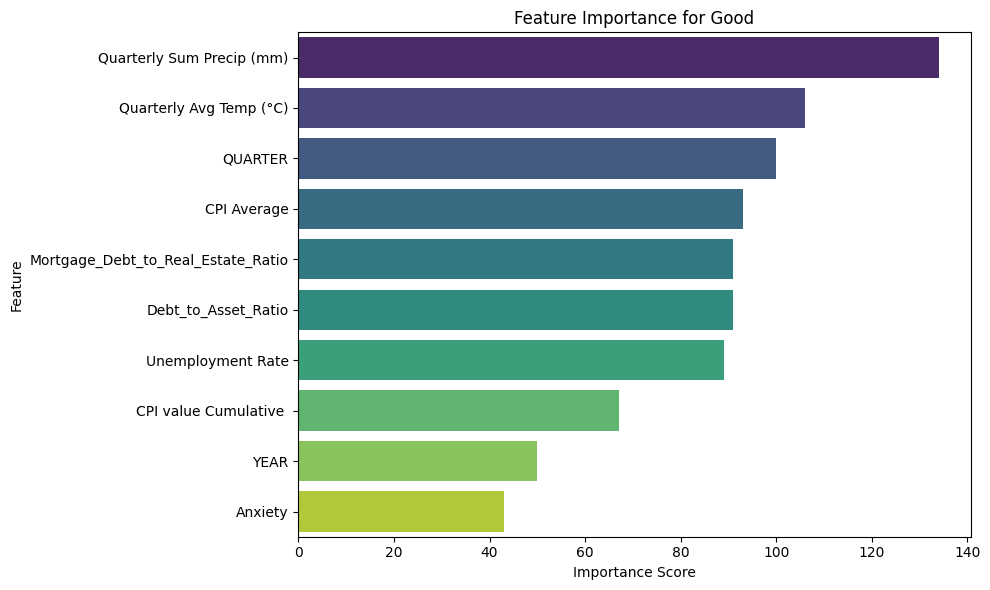

<ipython-input-3-e02be2c41e56>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


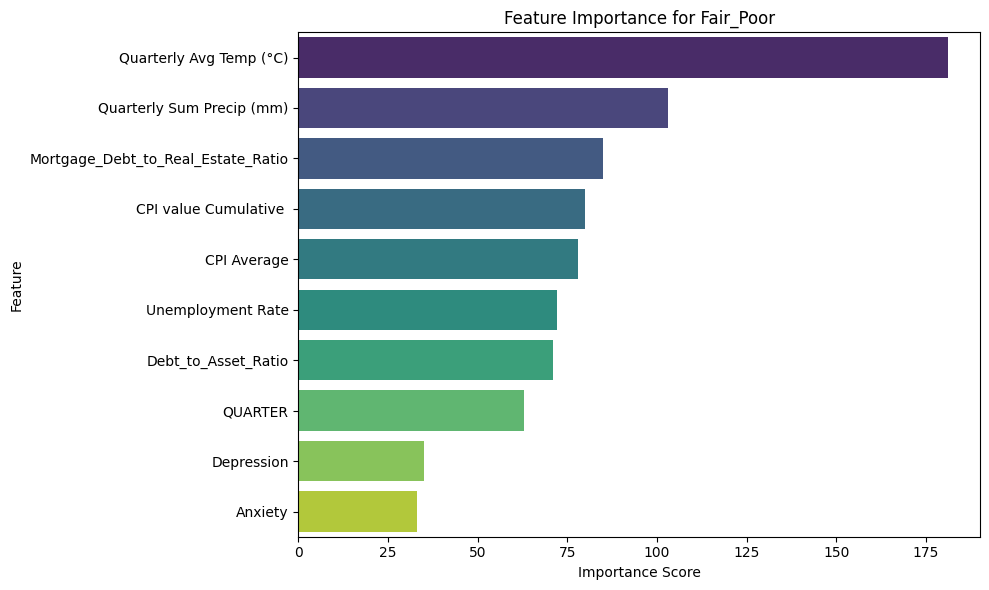

In [ ]:
def plot_feature_importance(model, feature_names, title, top_n=10):
    importance_dict = model.get_booster().get_score(importance_type='weight')

    importance_df = pd.DataFrame({
        'Feature': [feature_names[int(k[1:])] for k in importance_dict.keys()],
        'Importance': list(importance_dict.values())
    })

    importance_df = importance_df.sort_values(by='Importance', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(title)
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

feature_names = X_train.columns.tolist()

plot_feature_importance(model_exc, feature_names, "Feature Importance for Excellent_Very_Good")
plot_feature_importance(model_good, feature_names, "Feature Importance for Good")
plot_feature_importance(model_fair, feature_names, "Feature Importance for Fair_Poor")